<a href="https://colab.research.google.com/github/Alok1721/OpenCV_Workshop/blob/main/CV_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [39]:
!pip install mediapipe
!pip install cvzone

# Import Library

In [40]:
import cv2
import mediapipe as mp
import numpy as np
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation
from google.colab.patches import cv2_imshow

## Important Function

In [41]:

segmentor = SelfiSegmentation()

def gaussian_blur(image, kernel_size):
    height, width, channels = image.shape
    kernel = gaussian_kernel(kernel_size)

    # Pad the image
    pad_height = kernel_size // 2
    pad_width = kernel_size // 2
    padded_image = np.zeros((height + 2 * pad_height, width + 2 * pad_width, channels), dtype=image.dtype)
    padded_image[pad_height:pad_height+height, pad_width:pad_width+width, :] = image

    # Apply convolution
    output_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            for c in range(channels):
                output_image[i, j, c] = np.sum(padded_image[i:i+kernel_size, j:j+kernel_size, c] * kernel)

    return output_image

def gaussian_kernel(size, sigma=1.0):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * np.exp(-((x - (size - 1) / 2) ** 2 + (y - (size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    kernel /= np.sum(kernel)
    return kernel


### Image Input and output

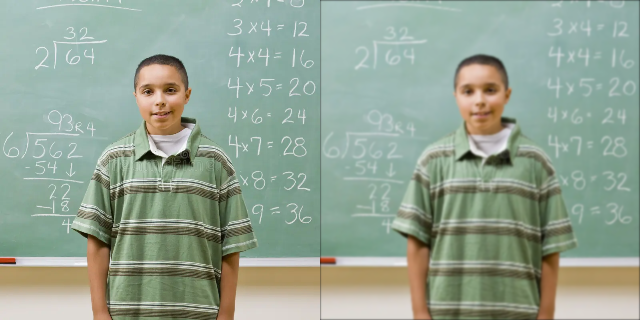

In [42]:
img_o = cv2.imread('image7.jpg')
img1=cv2.imread('image7.jpg')
img1=cv2.resize(img1,(320,320))
img=cv2.resize(img_o,(320,320))
#Gaussian=cv2.GaussianBlur(img,(23,23),0)
Gaussian=gaussian_blur(img,23)
cv2_imshow(np.hstack([img,Gaussian]))

### remove background

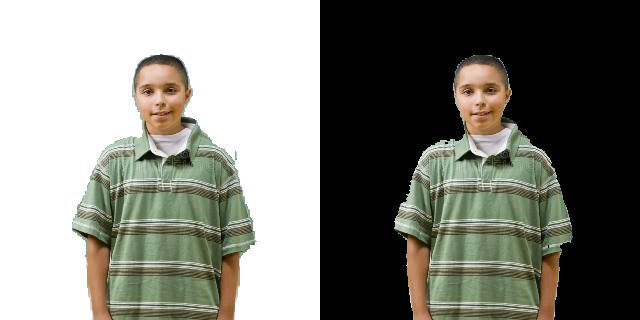

In [43]:
imgout = segmentor.removeBG(img, (255, 255, 255), cutThreshold=0.1)
imgout2 = segmentor.removeBG(img, (0, 0, 0), cutThreshold=0.4)
cv2_imshow(np.hstack([imgout,imgout2]))

### masking of images

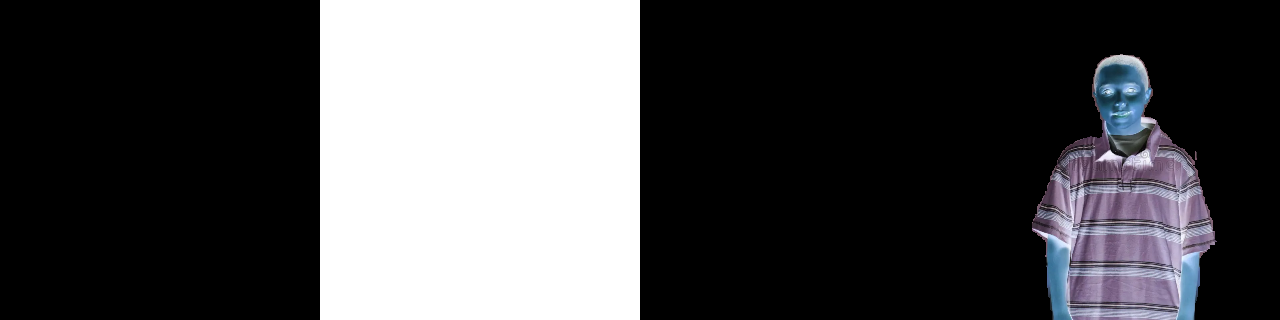

In [44]:
mask = np.zeros_like(img)
mask_inv=cv2.bitwise_not(mask)
masked_background = cv2.bitwise_and(Gaussian, mask)

inv_imageout=cv2.bitwise_not(imgout)
cv2_imshow(np.hstack([mask,mask_inv,masked_background,inv_imageout]))

### masking on original image

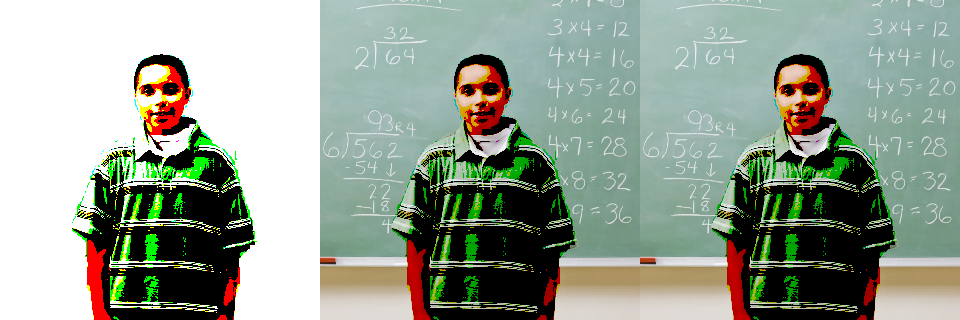

In [45]:
ret1, thresh1 = cv2.threshold(inv_imageout, 100, 255, cv2.THRESH_BINARY_INV)      #tune the numerical values at place of *
#ret1, thresh1 = cv2.threshold(inv_imageout, **, **, cv2.THRESH_BINARY_INV)
img_binary=cv2.bitwise_and(img,thresh1)
gaussian_blur=gaussian_blur(img_binary,1)                                         #tune the numerical values at place of *
#gaussian_blur=gaussian_blur(img_binary,*)
cv2_imshow(np.hstack([thresh1,img_binary,gaussian_blur]))

### bluring the edges

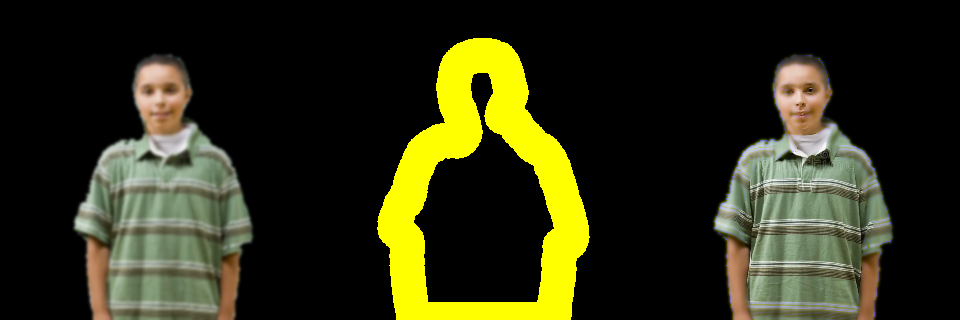

In [46]:
blurred_img = cv2.GaussianBlur(imgout2, (7, 7), 0)
#blurred_img=gaussian_blur(img,13)
gray = cv2.cvtColor(imgout2, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)[1]
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(imgout2.shape, np.uint8)
cv2.drawContours(mask, contours, -1, (0, 255, 255), 63)                         #tune the numerical values at place of *
#cv2.drawContours(mask, contours, -1, (0, 255, 255), *)
output = np.where(mask == (255, 255, 255), blurred_img, imgout2)                 #tune the numerical values at place of *
#output = np.where(mask == (255, 255, 255), blurred_img, imgout2)
cv2_imshow(np.hstack([blurred_img,mask,output]))

### comibing two images

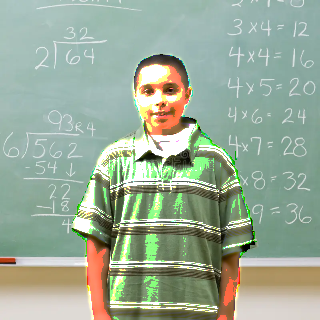

In [47]:
final_output=cv2.add(gaussian_blur,output)
cv2_imshow(final_output)